In [1]:
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.ticker as ticker
from matplotlib import cm

from py.params import setParams
from py.analysis import computeFPs, checkFixPtsStability
from py.analysis import activity_ui, activity_ue



In [2]:
def sig(x, beta, mu):
    return 1/(1+np.exp(-beta*(x-mu)))

def sig_deriv(x, beta, mu):
    return (beta*np.exp(-beta*(x-mu))/(1+np.exp(-beta*(x-mu)))**2)

def w(x, sigma):
    return (1/(np.sqrt(2*np.pi)*sigma))*np.exp(-(((x**2))/(2*(sigma**2))))

def w_hat(sigma, k):
    return np.exp(-(1/2) * (sigma**2) * (k**2) )

In [3]:
#generate values for different betas
x = np.linspace(-10,10,101)

b_vals = np.zeros((3, len(x)))
betas = [1, 5, 10]
print(b_vals[1].shape)
count = 0
for beta in betas:
    b_vals[count] = sig(x, beta, 0)
    count+=1

f = sig(x, 0.5, 0)
df = sig_deriv(x, 2, 2)

kern = w(x, 2)

kern_hat = w_hat(x, 2)

(101,)


Text(0.5, 1.0, 'Transfer function')

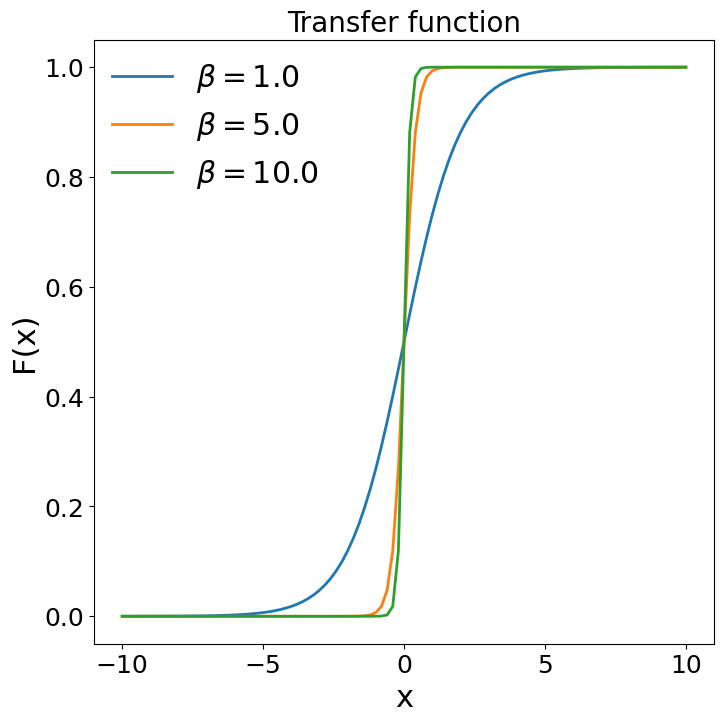

In [4]:
path = '/Users/ronja/opt/anaconda3/lib/python3.9/site-packages/matplotlib/mpl-data/stylelib/'
plt.style.use(path + 'template.mplstyle')

plt.figure()

for idx in range(3):
    plt.plot(x, b_vals[idx], label=r'$\beta=%.1f$' %betas[idx])
    
plt.legend(loc=(0.01, 0.73))
plt.xlabel('x')
plt.ylabel('F(x)')
plt.title('Transfer function')

In [10]:
#generate Nullcline plots for different betas
u=np.linspace(0,1,101)

#normal beta nullclines
params = {'I_e': 0.6, 'I_i': 0.0}
ps = setParams(params)
fps = computeFPs(ps)
stab = checkFixPtsStability(fps, ps)

print('With beta=%i, we have fixed points %s and stability %s' %(int(ps.beta_e),str(fps), str(stab)))

ui_nullcline = activity_ui(u, ps)
ue_nullcline = activity_ue(u, ps)

xlim_min = -0.1
xlim_max = 1.2

ylim_min = -0.1
ylim_max = 1.4

ue_nullcline[-1] = xlim_max

ui_nullcline[0] = ylim_max
ui_nullcline[-1] = ylim_min


#'steeper' beta-nullclines, i.e. increase in beta
params = {'I_e': 0.6, 'I_i': 0.0, 'beta_e': 10, 'beta_i': 10}
ps = setParams(params)
fps5 = computeFPs(ps)
stab5 = checkFixPtsStability(fps5, ps)

print('With beta=%i, we have fixed points %s and stability %s' %(int(ps.beta_e),str(fps5), str(stab5)))

ui_nullcline5 = activity_ui(u, ps)
ue_nullcline5 = activity_ue(u, ps)

ue_nullcline5[0] = xlim_min
ue_nullcline5[-1] = xlim_max

ui_nullcline5[0] = ylim_max
ui_nullcline5[-1] = ylim_min

With beta=5, we have fixed points [[0.16747037 0.56024525]
 [0.6673012  0.99852425]
 [0.99742381 0.99999359]] and stability [1, 0, 1]
With beta=10, we have fixed points [[0.11796372 0.45333443]
 [0.64344433 0.99999514]
 [0.99999385 1.        ]] and stability [0, 0, 1]


Text(0.5, 1.0, '$Nullclines\\ for\\ I_e=0.8,\\ I_i=0$')

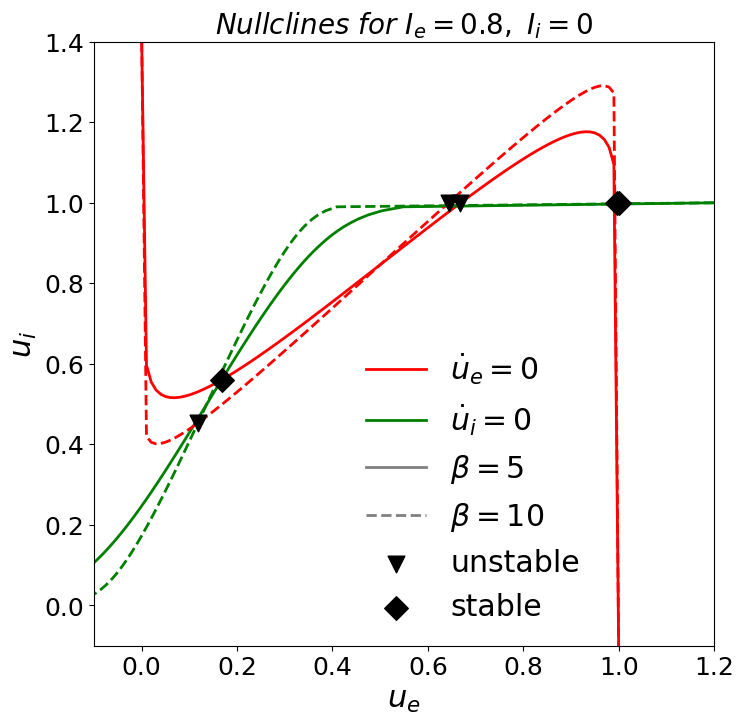

In [14]:
path = '/Users/ronja/opt/anaconda3/lib/python3.9/site-packages/matplotlib/mpl-data/stylelib/'
plt.style.use(path + 'template.mplstyle')


ecol = 'red'
icol = 'green'

plt.figure()

plt.plot(u, ui_nullcline, c=ecol, label=r'$\dot{u}_e=0$', zorder=1)
plt.plot(ue_nullcline, u, c=icol, label=r'$\dot{u}_i=0$', zorder=1)

fps_stable = np.array([fps[0], fps[-1]])
fps_unstable = fps[1]

plt.scatter(fps_stable[:,0], fps_stable[:,1], c='black', marker='D', zorder=2)
plt.scatter(fps_unstable[0], fps_unstable[1], c='black', marker='v', zorder=2)



plt.plot(u, ui_nullcline5, c=ecol, zorder=1, ls='dashed')
plt.plot(ue_nullcline5, u, c=icol, zorder=1, ls='dashed')


fps_stable5 = fps5[-1]
fps_unstable5 = np.array([fps5[0], fps5[1]])

plt.plot(0,0, label=r'$\beta = 5$', c = 'grey')
plt.plot(0,0, label=r'$\beta = 10$', ls='dashed', c = 'grey')

plt.scatter(fps_unstable5[:,0], fps_unstable5[:,1], c='black', marker='v', zorder=2, label='unstable')
plt.scatter(fps_stable5[0], fps_stable5[1], c='black', marker='D', zorder=2, label='stable')


plt.legend(loc=(0.42, 0.02))
plt.xlabel(r'$u_e$')
plt.ylabel(r'$u_i$')
plt.xlim(xlim_min, xlim_max)
plt.ylim(ylim_min, ylim_max)
plt.title(r'$Nullclines\ for\ I_e=0.8,\ I_i=0$')

In [67]:
#plot the already determined parameter space for different beta scales

import pandas as pd

df = pd.read_csv('higher_beta.csv')

xaxis = 'I_e'
yaxis='I_i'

/var/folders/8l/w8cdnkkj38bg2pscx__1vxth0000gn/T/ipykernel_2785/1881260841.py:16: UserWarning: No contour levels were found within the data range.
  ax.contour(turings, origin='lower', vmin=0, vmax=1, levels=0, colors='black', linestyles='dashed')
/var/folders/8l/w8cdnkkj38bg2pscx__1vxth0000gn/T/ipykernel_2785/1881260841.py:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=xlabels)
/var/folders/8l/w8cdnkkj38bg2pscx__1vxth0000gn/T/ipykernel_2785/1881260841.py:45: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels=ylabels)


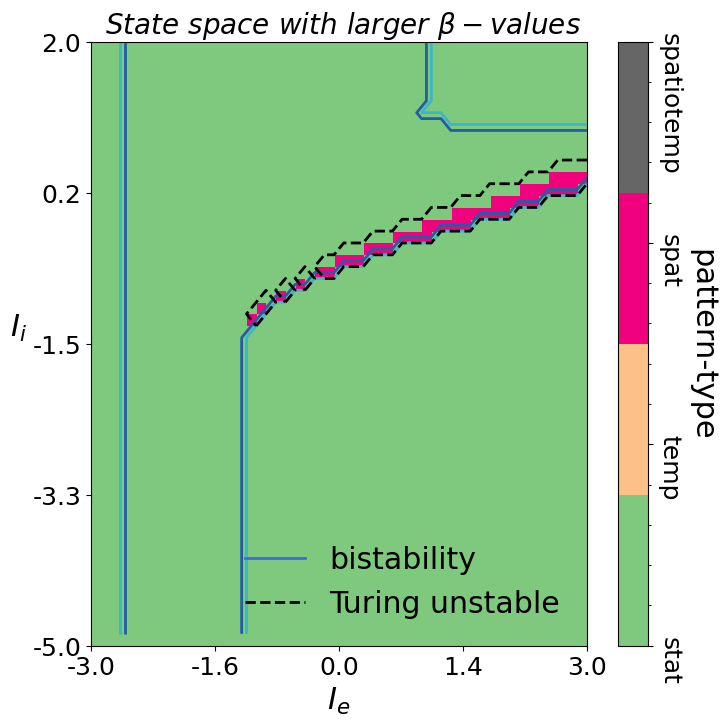

In [71]:
path = '/Users/ronja/opt/anaconda3/lib/python3.9/site-packages/matplotlib/mpl-data/stylelib/'
plt.style.use(path + 'template.mplstyle')

p_colors = cm.get_cmap('Accent', 4)

stabis = df.pivot_table('stability', columns=xaxis, index=yaxis)
turings = df.pivot_table('turing', columns=xaxis, index=yaxis)
p_randoms = df.pivot_table('p_random', columns=xaxis, index=yaxis)
    
p_turings = df.pivot_table('p_turing', columns=xaxis, index=yaxis)

fig, ax = plt.subplots(1,1,figsize=(8.5,6.5))

pos = ax.imshow(p_turings, origin='lower', vmin=1, vmax=4, aspect='auto', cmap=p_colors)
ax.contour(stabis, origin='lower', vmin=0, vmax=2, levels=1, cmap='YlGnBu')
ax.contour(turings, origin='lower', vmin=0, vmax=1, levels=0, colors='black', linestyles='dashed')

ax.set(title=r'$\ State\ space\ with\ larger\ \beta-values $')
#ax.title.set_size(20)

plt.plot(0,0, label='bistability', c='royalblue')
plt.plot(0,0, label='Turing unstable', c='black', ls='dashed')


# Add minorticks on the colorbar to make it easy to read the
# values off the colorbar.

nmb_labels = 5
            
idx_x = np.linspace(0,len(stabis.columns.values)-1, nmb_labels).astype(int)
idx_y = np.linspace(0,len(stabis.index.values)-1, nmb_labels).astype(int)
    
xliste= np.round(stabis.columns.values, decimals=2)[idx_x]
yliste= np.round(stabis.index.values, decimals=2)[idx_y]

#xliste = np.linspace(xaxis[0],xaxis[-1],nmb_labels)
#yliste = np.linspace(yaxis[-1],yaxis[0],nmb_labels)

xlabels=list('%.1f'%(e) for e in xliste)
ylabels=list('%.1f'%(e) for e in yliste)

ax.xaxis.set_major_locator(ticker.LinearLocator(nmb_labels))
ax.set_xticklabels(labels=xlabels)
ax.yaxis.set_major_locator(ticker.LinearLocator(nmb_labels))
ax.set_yticklabels(labels=ylabels)

ax.set_xlabel(r'$%s$' %xaxis)
ax.set_ylabel(r'$%s$' %yaxis, labelpad=10, rotation=0)

ax.label_outer()

mini = 1
maxi = 4
cbar_ticks=np.linspace(mini,maxi,4)
cbar_ticks=np.around(cbar_ticks, decimals=0)
cbar_labels=['stat', 'temp', 'spat', 'spatiotemp']

# Create colorbar
cbar = ax.figure.colorbar(pos, ax=ax, ticks=cbar_ticks)
cbar.ax.set_ylabel('pattern-type', rotation=-90, va="bottom")
cbar.ax.set_yticklabels(cbar_labels, rotation=-90)
    
plt.legend(loc='lower right')
    
cbar.minorticks_on()


plt.show()